In [1]:
import pandas as pd

# Ouvrir le fichier CSV
df = pd.read_csv('MG_D.csv')

# Afficher les premières lignes du fichier
print(df.head())

   2024-04-15 08:00:05.130  -0.031250  0.250000  1.078125
0  2024-04-15 08:00:05.140  -0.578125  0.093750  0.734375
1  2024-04-15 08:00:05.150  -0.593750  0.093750  0.781250
2  2024-04-15 08:00:05.159  -0.593750  0.093750  0.781250
3  2024-04-15 08:00:05.170  -0.593750  0.109375  0.781250
4  2024-04-15 08:00:05.180  -0.593750  0.093750  0.781250


In [2]:
import numpy as np

In [3]:
num_columns = df.shape[1]
print(f"Le nombre de colonnes dans le tableau est : {num_columns}")

Le nombre de colonnes dans le tableau est : 4


In [4]:
noms_colonnes = df.columns
print(f"Les noms des colonnes dans le tableau sont : {noms_colonnes}") 
df.columns = ['date_heure', 'X', 'Y', 'Z']
print(f"Nouveaux noms des colonnes : {df.columns}")

Les noms des colonnes dans le tableau sont : Index(['2024-04-15 08:00:05.130', '-0.031250', '0.250000', '1.078125'], dtype='object')
Nouveaux noms des colonnes : Index(['date_heure', 'X', 'Y', 'Z'], dtype='object')


In [5]:
# Convertir la colonne 'date_heure' en type datetime
df['date_heure'] = pd.to_datetime(df['date_heure'])

# Calculer la différence de temps entre les échantillons
time_diffs = df['date_heure'].diff().dropna()

# Calculer la fréquence d'échantillonnage (nombre d'échantillons par seconde)
sampling_frequency = 1 / time_diffs.dt.total_seconds().mean()

print(f"La fréquence d'échantillonnage est : {sampling_frequency} Hz")

La fréquence d'échantillonnage est : 96.72113519937771 Hz


In [6]:
# Définir la nouvelle fréquence d'échantillonnage
new_sampling_frequency = 100  # en Hz

# Créer une nouvelle série temporelle avec la nouvelle fréquence d'échantillonnage
new_time_index = pd.date_range(start=df['date_heure'].min(), end=df['date_heure'].max(), freq=f'{1/new_sampling_frequency}S')

# Réindexer le DataFrame pour inclure la nouvelle série temporelle
df_reindexed = df.set_index('date_heure').reindex(new_time_index)

# Interpoler les valeurs manquantes avec une interpolation linéaire
df_interpolated = df_reindexed.interpolate(method='linear')

# Réinitialiser l'index pour avoir 'date_heure' comme colonne
df_interpolated.reset_index(inplace=True)
df_interpolated.rename(columns={'index': 'date_heure'}, inplace=True)

print(df_interpolated.head())

/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_14782/2718167284.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  new_time_index = pd.date_range(start=df['date_heure'].min(), end=df['date_heure'].max(), freq=f'{1/new_sampling_frequency}S')


               date_heure         X         Y         Z
0 2024-04-15 08:00:05.140 -0.578125  0.093750  0.734375
1 2024-04-15 08:00:05.150 -0.593750  0.093750  0.781250
2 2024-04-15 08:00:05.160 -0.593750  0.101562  0.781250
3 2024-04-15 08:00:05.170 -0.593750  0.109375  0.781250
4 2024-04-15 08:00:05.180 -0.593750  0.093750  0.781250


               date_heure         X         Y         Z  X_smooth  Y_smooth  \
0 2024-04-15 08:00:05.140 -0.578125  0.093750  0.734375 -0.590010  0.097332   
1 2024-04-15 08:00:05.150 -0.593750  0.093750  0.781250 -0.590481  0.096936   
2 2024-04-15 08:00:05.160 -0.593750  0.101562  0.781250 -0.590918  0.096576   
3 2024-04-15 08:00:05.170 -0.593750  0.109375  0.781250 -0.591321  0.096252   
4 2024-04-15 08:00:05.180 -0.593750  0.093750  0.781250 -0.591692  0.095961   

   Z_smooth  
0  0.768510  
1  0.770327  
2  0.771999  
3  0.773531  
4  0.774930  


/Users/leoolivier/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


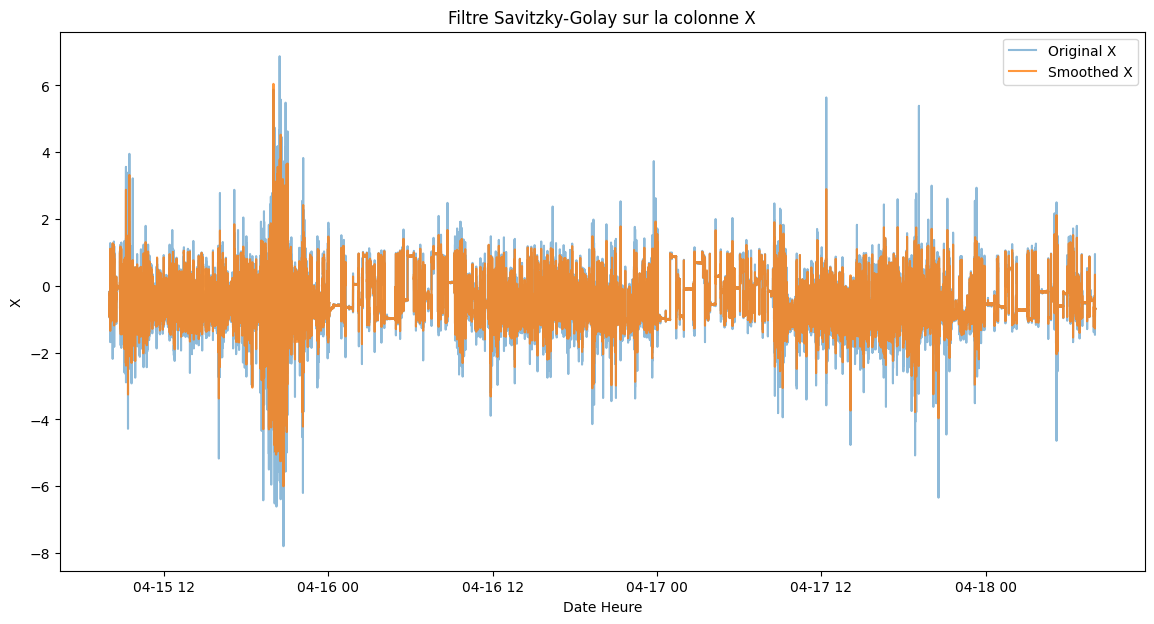

In [7]:
from scipy.signal import savgol_filter

# Appliquer le filtre Savitzky-Golay sur les colonnes X, Y et Z
df_interpolated['X_smooth'] = savgol_filter(df_interpolated['X'], window_length=51, polyorder=3)
df_interpolated['Y_smooth'] = savgol_filter(df_interpolated['Y'], window_length=51, polyorder=3)
df_interpolated['Z_smooth'] = savgol_filter(df_interpolated['Z'], window_length=51, polyorder=3)

print(df_interpolated.head())
import matplotlib.pyplot as plt

# Visualiser les données originales et lissées pour la colonne X
plt.figure(figsize=(14, 7))
plt.plot(df_interpolated['date_heure'], df_interpolated['X'], label='Original X', alpha=0.5)
plt.plot(df_interpolated['date_heure'], df_interpolated['X_smooth'], label='Smoothed X', alpha=0.8)
plt.xlabel('Date Heure')
plt.ylabel('X')
plt.title('Filtre Savitzky-Golay sur la colonne X')
plt.legend()
plt.show()

/Users/leoolivier/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


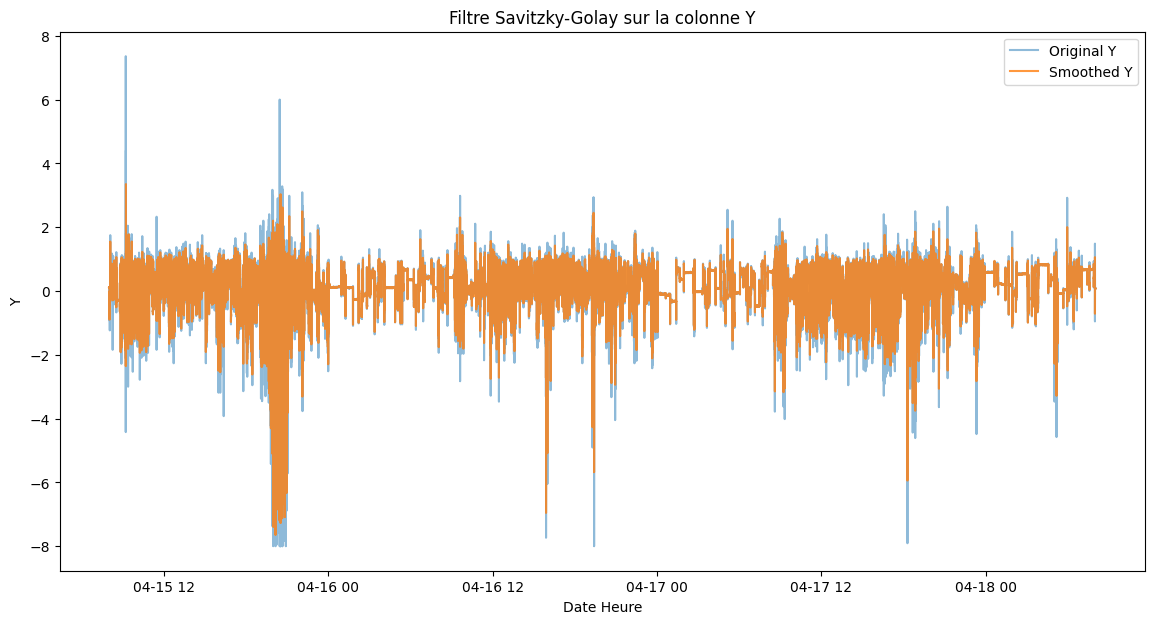

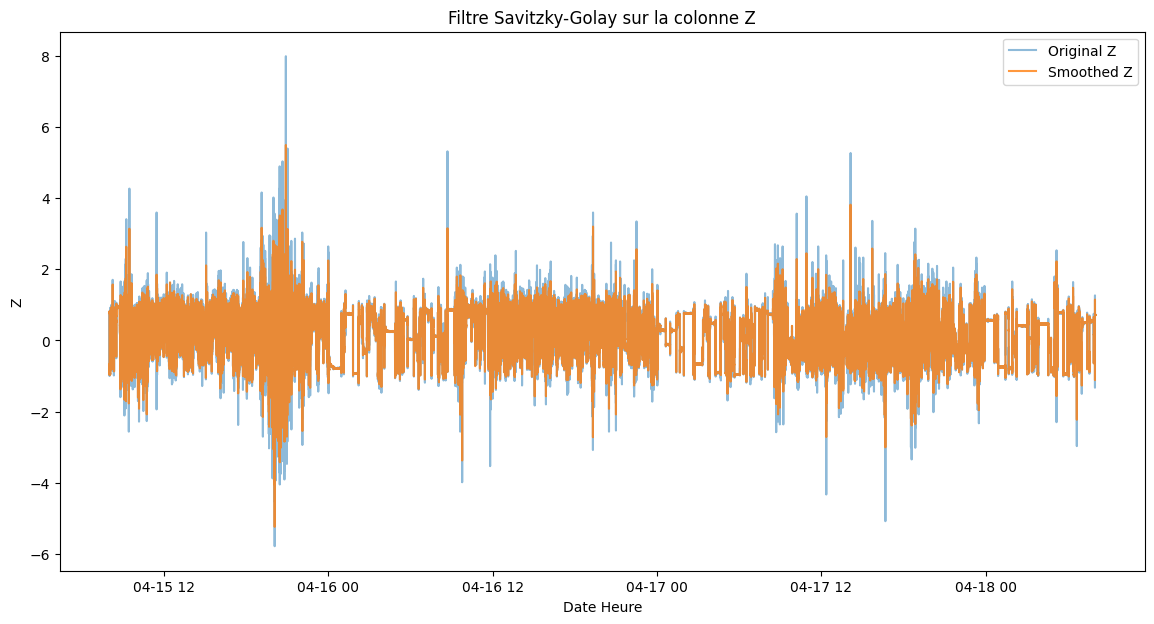

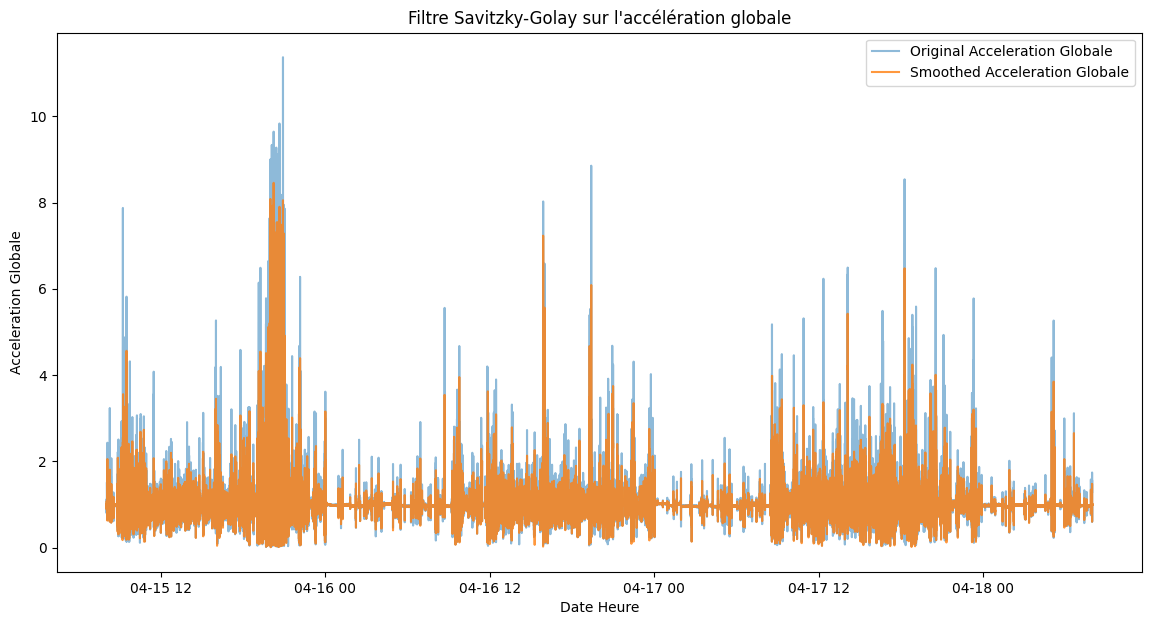

In [8]:
# Calculer l'accélération globale
df_interpolated['acceleration_globale'] = np.sqrt(df_interpolated['X']**2 + df_interpolated['Y']**2 + df_interpolated['Z']**2)
df_interpolated['acceleration_globale_smooth'] = np.sqrt(df_interpolated['X_smooth']**2 + df_interpolated['Y_smooth']**2 + df_interpolated['Z_smooth']**2)

# Visualiser les données originales et lissées pour la colonne Y
plt.figure(figsize=(14, 7))
plt.plot(df_interpolated['date_heure'], df_interpolated['Y'], label='Original Y', alpha=0.5)
plt.plot(df_interpolated['date_heure'], df_interpolated['Y_smooth'], label='Smoothed Y', alpha=0.8)
plt.xlabel('Date Heure')
plt.ylabel('Y')
plt.title('Filtre Savitzky-Golay sur la colonne Y')
plt.legend()
plt.show()

# Visualiser les données originales et lissées pour la colonne Z
plt.figure(figsize=(14, 7))
plt.plot(df_interpolated['date_heure'], df_interpolated['Z'], label='Original Z', alpha=0.5)
plt.plot(df_interpolated['date_heure'], df_interpolated['Z_smooth'], label='Smoothed Z', alpha=0.8)
plt.xlabel('Date Heure')
plt.ylabel('Z')
plt.title('Filtre Savitzky-Golay sur la colonne Z')
plt.legend()
plt.show()

# Visualiser les données originales et lissées pour l'accélération globale
plt.figure(figsize=(14, 7))
plt.plot(df_interpolated['date_heure'], df_interpolated['acceleration_globale'], label='Original Acceleration Globale', alpha=0.5)
plt.plot(df_interpolated['date_heure'], df_interpolated['acceleration_globale_smooth'], label='Smoothed Acceleration Globale', alpha=0.8)
plt.xlabel('Date Heure')
plt.ylabel('Acceleration Globale')
plt.title('Filtre Savitzky-Golay sur l\'accélération globale')
plt.legend()
plt.show()

/Users/leoolivier/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


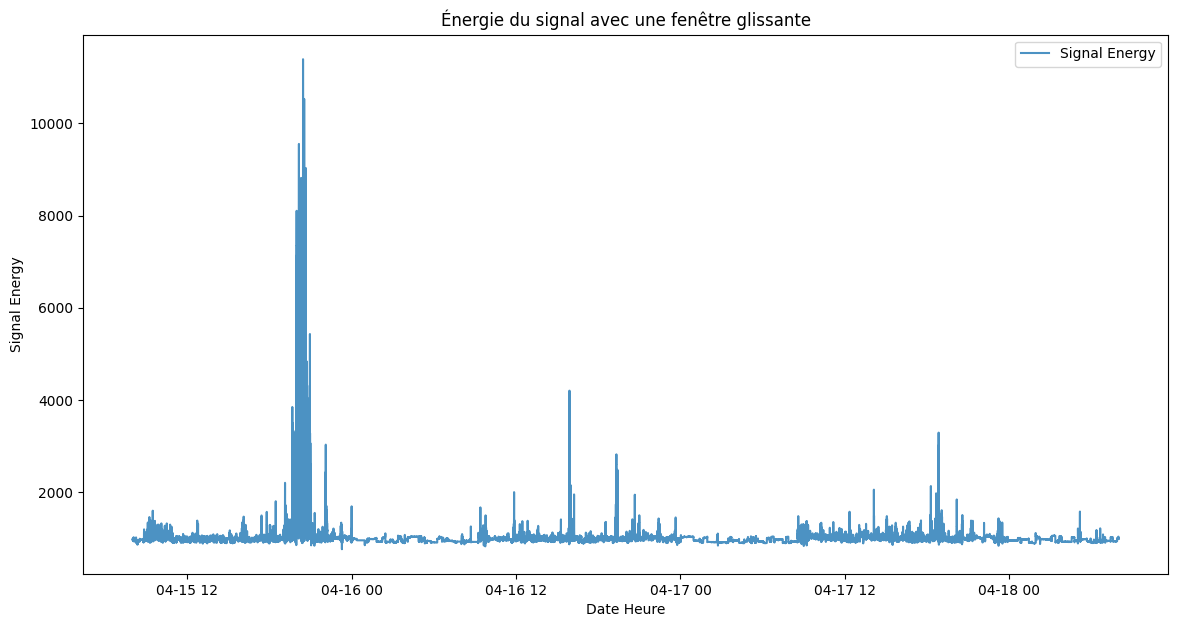

In [ ]:
# Définir la taille de la fenêtre (en nombre d'échantillons)
window_size = 1000  

# Calculer l'énergie du signal pour chaque fenêtre
def calculate_signal_energy(df, window_size):
    energy = []
    for i in range(0, len(df) - window_size + 1, window_size):
        window = df['acceleration_globale_smooth'].iloc[i:i + window_size]
        energy.append((window ** 2).sum())
    return energy

# Appliquer la fonction pour calculer l'énergie du signal
signal_energy = calculate_signal_energy(df_interpolated, window_size)

# Ajouter l'énergie du signal au DataFrame
df_interpolated['signal_energy'] = np.nan
for i, e in enumerate(signal_energy):
    df_interpolated.loc[i * window_size:(i + 1) * window_size - 1, 'signal_energy'] = e

# Visualiser l'énergie du signal
plt.figure(figsize=(14, 7))
plt.plot(df_interpolated['date_heure'], df_interpolated['signal_energy'], label='Signal Energy', alpha=0.8)
plt.xlabel('Date Heure')
plt.ylabel('Signal Energy')
plt.title('Énergie du signal avec une fenêtre glissante')
plt.legend()
plt.show()

In [ ]:
import ruptures as rpt
# Rééchantillonner les données à 10 Hz
new_sampling_frequency = 10  

# Créer une nouvelle série temporelle avec la nouvelle fréquence d'échantillonnage
new_time_index = pd.date_range(start=df_interpolated['date_heure'].min(), end=df_interpolated['date_heure'].max(), freq=f'{1/new_sampling_frequency}S')

# Réindexer le DataFrame pour inclure la nouvelle série temporelle
df_reindexed_10hz = df_interpolated.set_index('date_heure').reindex(new_time_index)

# Interpoler les valeurs manquantes avec une interpolation linéaire
df_interpolated_10hz = df_reindexed_10hz.interpolate(method='linear')

# Réinitialiser l'index pour avoir 'date_heure' comme colonne
df_interpolated_10hz.reset_index(inplace=True)
df_interpolated_10hz.rename(columns={'index': 'date_heure'}, inplace=True)

print(df_interpolated_10hz.head())



/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_18050/4025982955.py:6: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  new_time_index = pd.date_range(start=df_interpolated['date_heure'].min(), end=df_interpolated['date_heure'].max(), freq=f'{1/new_sampling_frequency}S')


               date_heure         X        Y         Z  X_smooth  Y_smooth  \
0 2024-04-15 08:00:05.140 -0.578125  0.09375  0.734375 -0.590010  0.097332   
1 2024-04-15 08:00:05.240 -0.593750  0.09375  0.781250 -0.593310  0.094838   
2 2024-04-15 08:00:05.340 -0.593750  0.09375  0.781250 -0.594286  0.094697   
3 2024-04-15 08:00:05.440 -0.593750  0.09375  0.781250 -0.594312  0.095257   
4 2024-04-15 08:00:05.540 -0.593750  0.09375  0.781250 -0.594755  0.095543   

   Z_smooth  acceleration_globale  acceleration_globale_smooth  signal_energy  
0  0.768510              0.939321                     0.973752     976.204585  
1  0.780794              0.985738                     0.985216     976.204585  
2  0.783295              0.985738                     0.987772     976.204585  
3  0.781250              0.985738                     0.986221     976.204585  
4  0.781250              0.985738                     0.986516     976.204585  


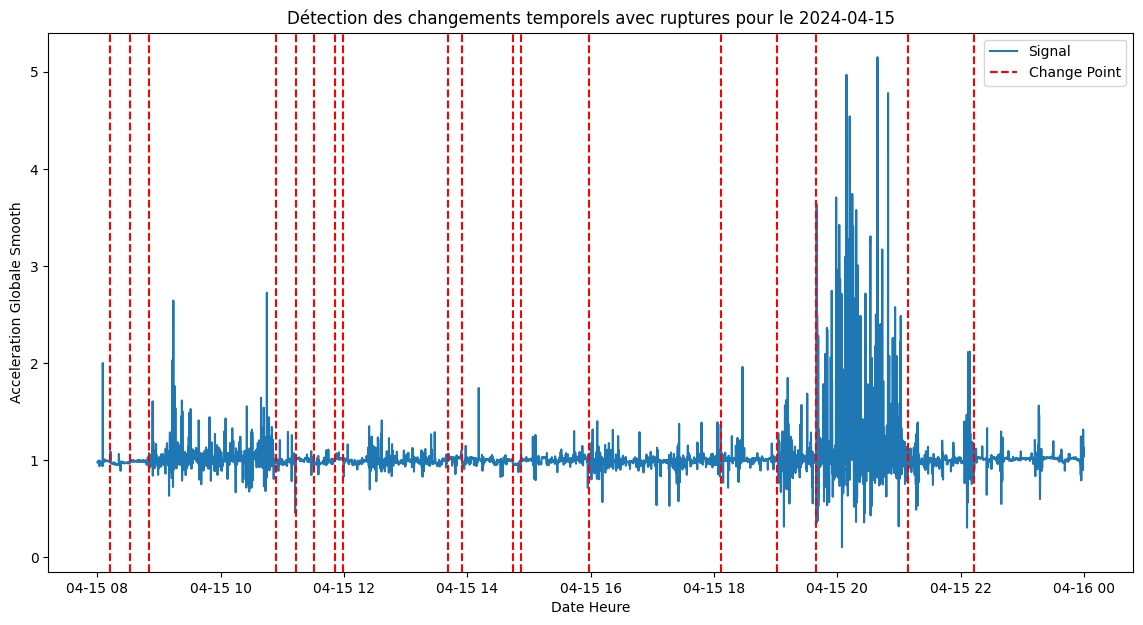

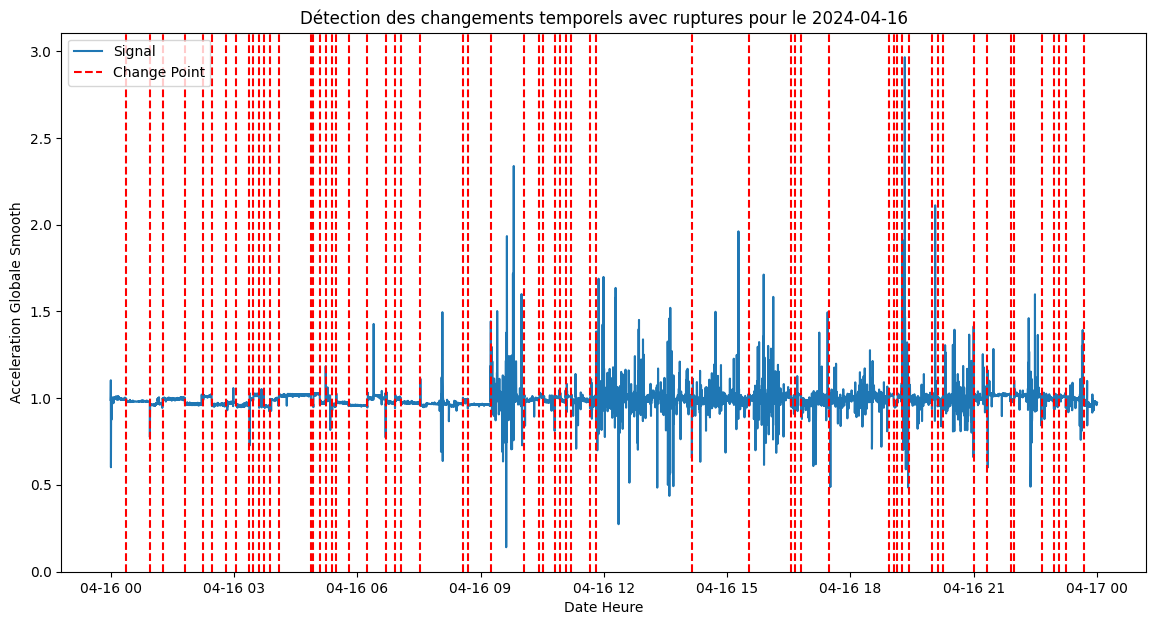

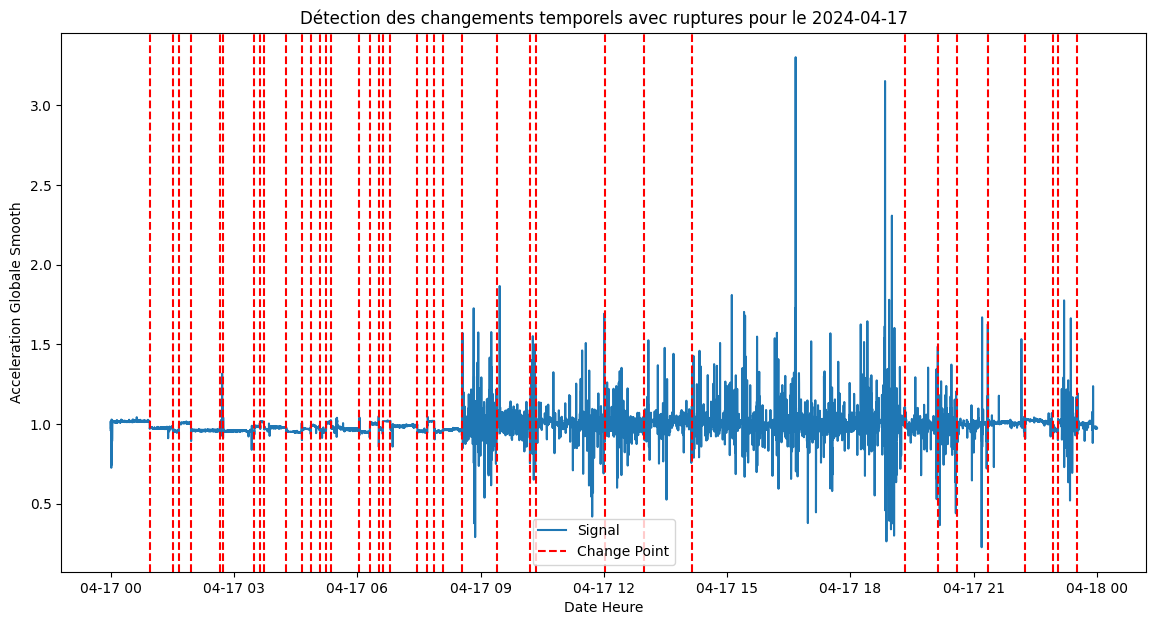

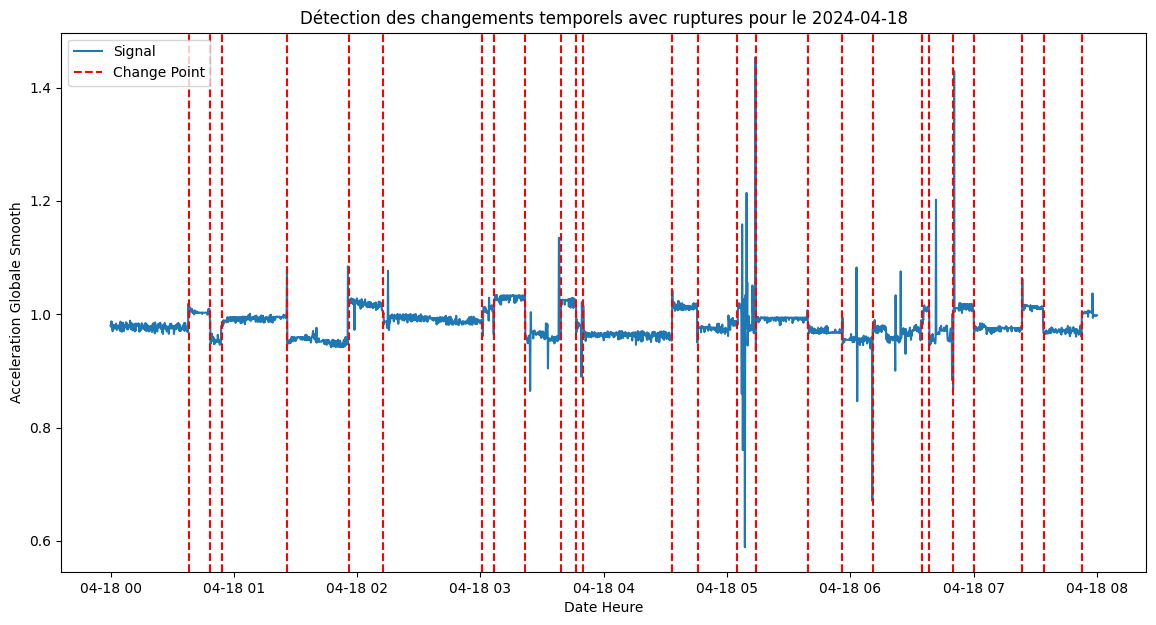

In [11]:

# Diviser les données par jour
df_interpolated_10hz['date'] = df_interpolated_10hz['date_heure'].dt.date
days = df_interpolated_10hz['date'].unique()

for day in days:
    df_day = df_interpolated_10hz[df_interpolated_10hz['date'] == day]
    signal = df_day['acceleration_globale_smooth'].values

    # Downsample the signal to reduce memory usage
    downsample_factor = 100  # Adjust this factor based on your memory constraints
    signal_downsampled = signal[::downsample_factor]
    time_downsampled = df_day['date_heure'].iloc[::downsample_factor]

    # Définir l'algorithme de détection de changement (ici, on utilise Pelt avec une pénalité)
    algo = rpt.Pelt(model="rbf").fit(signal_downsampled)
    result = algo.predict(pen=10)

    # Visualiser les points de changement détectés
    plt.figure(figsize=(14, 7))
    plt.plot(time_downsampled, signal_downsampled, label='Signal')
    for cp in result:
        if cp < len(time_downsampled):
            plt.axvline(time_downsampled.iloc[cp], color='r', linestyle='--', label='Change Point' if cp == result[0] else "")
    plt.xlabel('Date Heure')
    plt.ylabel('Acceleration Globale Smooth')
    plt.title(f'Détection des changements temporels avec ruptures pour le {day}')
    plt.legend()
    plt.show()


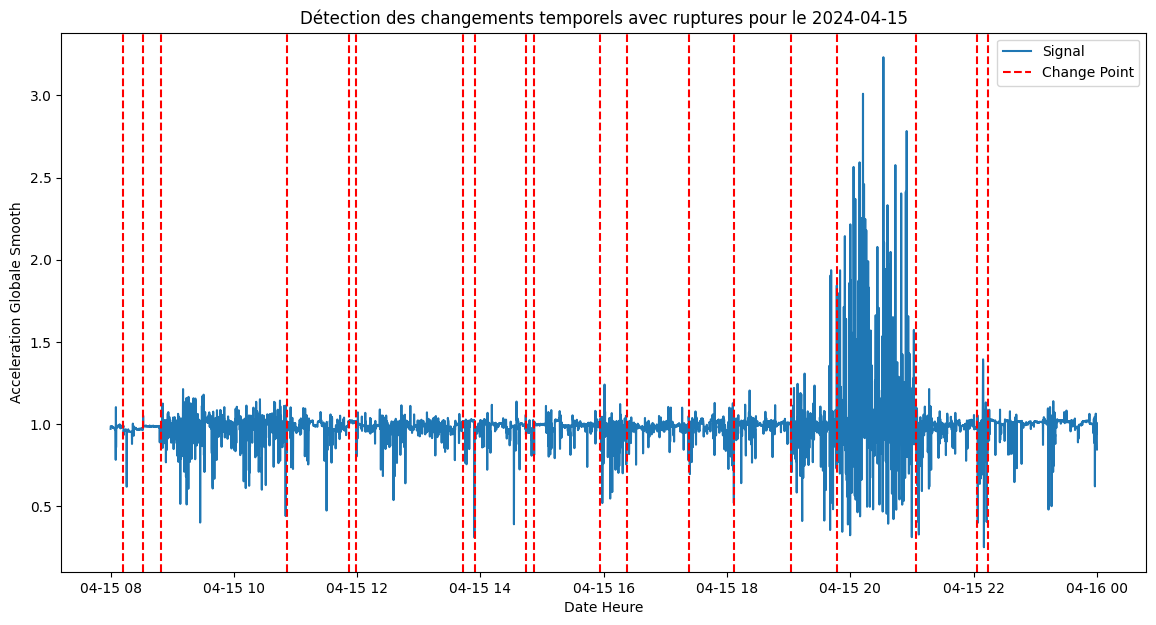

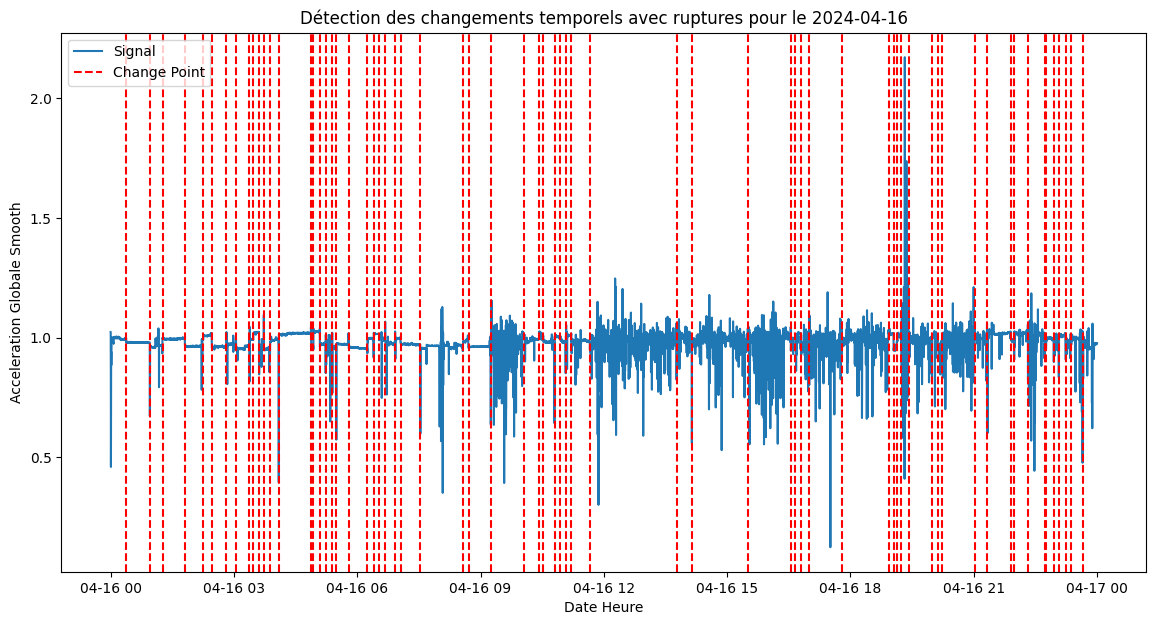

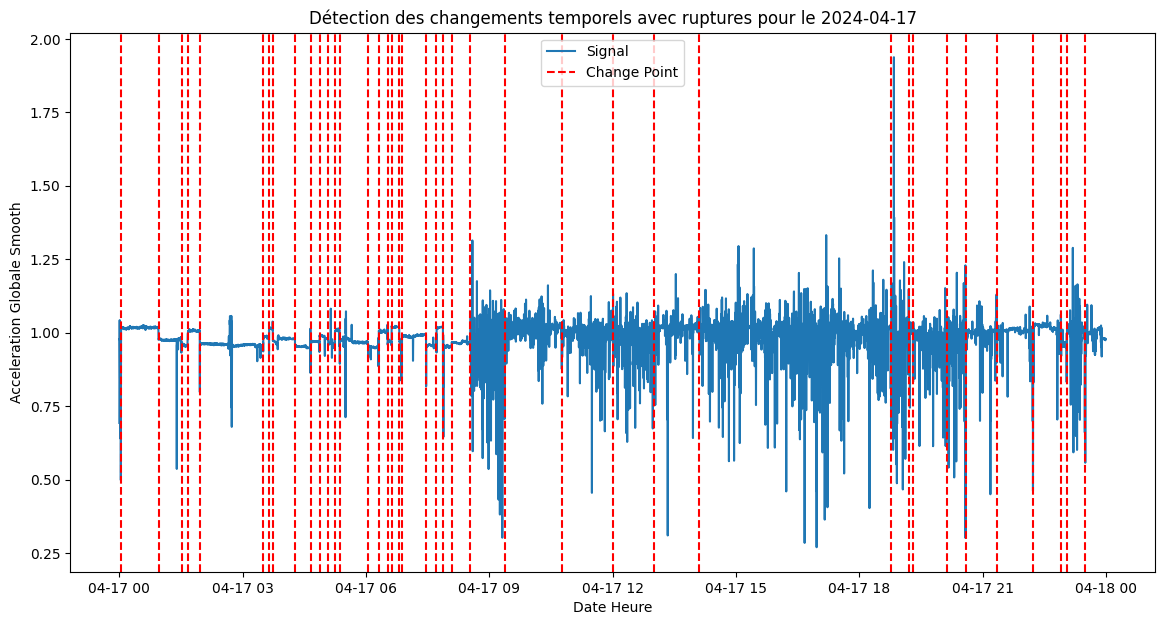

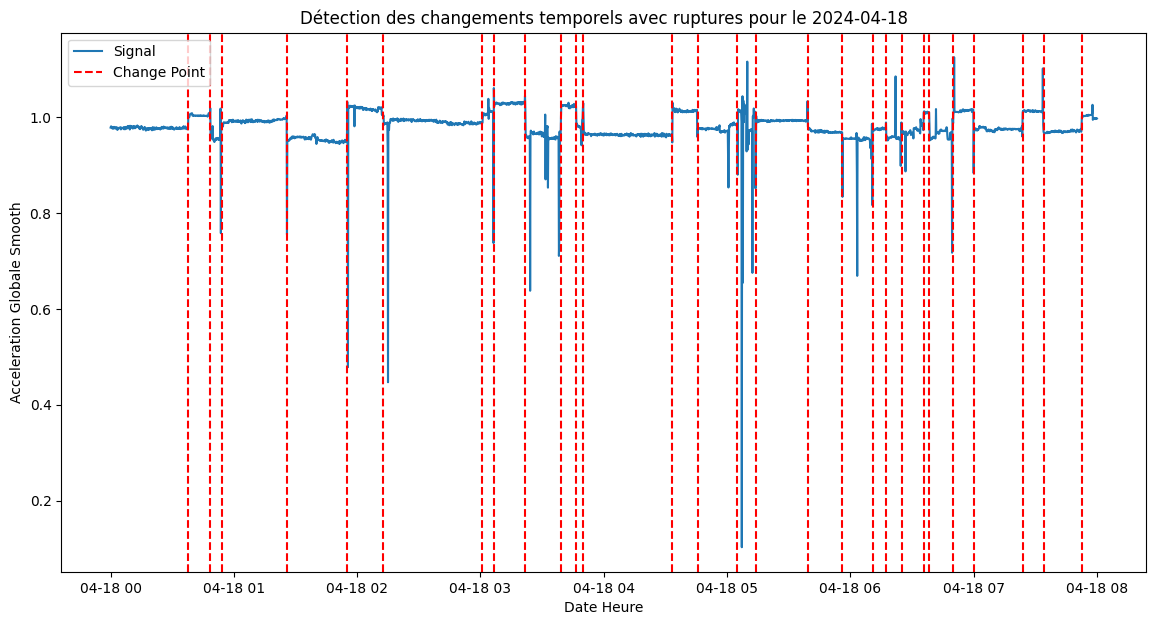

In [12]:
# Appliquer le filtre Savitzky-Golay sur les colonnes X, Y et Z
df_interpolated_10hz['X_smooth'] = savgol_filter(df_interpolated_10hz['X'], window_length=51, polyorder=3)
df_interpolated_10hz['Y_smooth'] = savgol_filter(df_interpolated_10hz['Y'], window_length=51, polyorder=3)
df_interpolated_10hz['Z_smooth'] = savgol_filter(df_interpolated_10hz['Z'], window_length=51, polyorder=3)

# Calculer l'accélération globale lissée
df_interpolated_10hz['acceleration_globale_smooth'] = np.sqrt(df_interpolated_10hz['X_smooth']**2 + df_interpolated_10hz['Y_smooth']**2 + df_interpolated_10hz['Z_smooth']**2)

# Sélectionner la colonne sur laquelle effectuer la détection de changement
signal = df_interpolated_10hz['acceleration_globale_smooth'].values

# Downsample the signal to reduce memory usage
downsample_factor = 100  # Adjust this factor based on your memory constraints
signal_downsampled = signal[::downsample_factor]
time_downsampled = df_interpolated_10hz['date_heure'].iloc[::downsample_factor]
# Diviser les données par jour
df_interpolated_10hz['date'] = df_interpolated_10hz['date_heure'].dt.date
days = df_interpolated_10hz['date'].unique()

for day in days:
    df_day = df_interpolated_10hz[df_interpolated_10hz['date'] == day]
    signal = df_day['acceleration_globale_smooth'].values

    # Downsample the signal to reduce memory usage
    signal_downsampled = signal[::downsample_factor]
    time_downsampled = df_day['date_heure'].iloc[::downsample_factor]

    # Définir l'algorithme de détection de changement (ici, on utilise Pelt avec une pénalité)
    algo = rpt.Pelt(model="rbf").fit(signal_downsampled)
    result = algo.predict(pen=10)

    # Visualiser les points de changement détectés
    plt.figure(figsize=(14, 7))
    plt.plot(time_downsampled, signal_downsampled, label='Signal')
    for cp in result:
        if cp < len(time_downsampled):
            plt.axvline(time_downsampled.iloc[cp], color='r', linestyle='--', label='Change Point' if cp == result[0] else "")
    plt.xlabel('Date Heure')
    plt.ylabel('Acceleration Globale Smooth')
    plt.title(f'Détection des changements temporels avec ruptures pour le {day}')
    plt.legend()
    plt.show()


In [13]:
from hmmlearn import hmm
from scipy.signal import find_peaks
from sklearn.preprocessing import StandardScaler


In [24]:
from scipy.signal import welch
from nolds import dfa
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
import numpy as np

# Supprimer les lignes contenant des NaN dans les descripteurs
descriptors = descriptors[~np.isnan(descriptors).any(axis=1)]
# Définir la taille de la fenêtre 
window_size = 100 

# Fonction pour calculer les descripteurs pour chaque fenêtre
def calculate_descriptors(df, window_size):
    descriptors = []
    for i in range(0, len(df) - window_size + 1, window_size):
        window = df.iloc[i:i + window_size]
        signal = window['acceleration_globale_smooth'].values
        
        # Calculer les descripteurs
        alpha_dfa = dfa(signal)
        energy = (signal ** 2).sum()
        variance = np.var(signal)
        std_dev = np.std(signal)
        freqs, psd = welch(signal, fs=new_sampling_frequency, nperseg=min(len(signal), 100))
        mean_freq = np.mean(freqs)
        quantiles = np.percentile(signal, [0, 25, 50, 75, 100])
        mean = np.mean(signal)
        median = np.median(signal)
        
        descriptors.append([
            alpha_dfa, energy, variance, std_dev, mean_freq,
            quantiles[0], quantiles[1], quantiles[2], quantiles[3], quantiles[4],
            mean, median
        ])
    return np.array(descriptors)

# Calculer les descripteurs pour chaque fenêtre
descriptors = calculate_descriptors(df_interpolated_10hz, window_size)

# Vérifier si les descripteurs ne sont pas vides et ont au moins deux échantillons
if descriptors.size > 0 and descriptors.shape[0] > 1:
    # Standardiser les descripteurs
    scaler = StandardScaler()
    descriptors_scaled = scaler.fit_transform(descriptors)

    # Supprimer les lignes contenant des NaN
    descriptors_scaled = descriptors_scaled[~np.isnan(descriptors_scaled).any(axis=1)]

    # Entraîner un modèle HMM sur 2 états : activité / inactivité (repos)
    model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
    model.fit(descriptors_scaled)

    # Prédire les états pour chaque fenêtre
    states = model.predict(descriptors_scaled)

    # Ajouter les états prédits au DataFrame
    df_interpolated_10hz['state'] = np.nan
    for i, state in enumerate(states):
        df_interpolated_10hz.loc[i * window_size:(i + 1) * window_size - 1, 'state'] = state

print(df_interpolated_10hz.head())

/Users/leoolivier/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/leoolivier/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/leoolivier/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/leoolivier/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/leoolivier/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:126

               date_heure         X        Y         Z  X_smooth  Y_smooth  \
0 2024-04-15 08:00:05.140 -0.578125  0.09375  0.734375 -0.584244  0.087388   
1 2024-04-15 08:00:05.240 -0.593750  0.09375  0.781250 -0.586756  0.089746   
2 2024-04-15 08:00:05.340 -0.593750  0.09375  0.781250 -0.589079  0.091956   
3 2024-04-15 08:00:05.440 -0.593750  0.09375  0.781250 -0.591219  0.094023   
4 2024-04-15 08:00:05.540 -0.593750  0.09375  0.781250 -0.593183  0.095950   

   Z_smooth  acceleration_globale  acceleration_globale_smooth  signal_energy  \
0  0.771278              0.939321                     0.971518     976.204585   
1  0.772004              0.985738                     0.973821     976.204585   
2  0.772682              0.985738                     0.975965     976.204585   
3  0.773311              0.985738                     0.977952     976.204585   
4  0.773895              0.985738                     0.979789     976.204585   

         date  state  
0  2024-04-15    0.0 

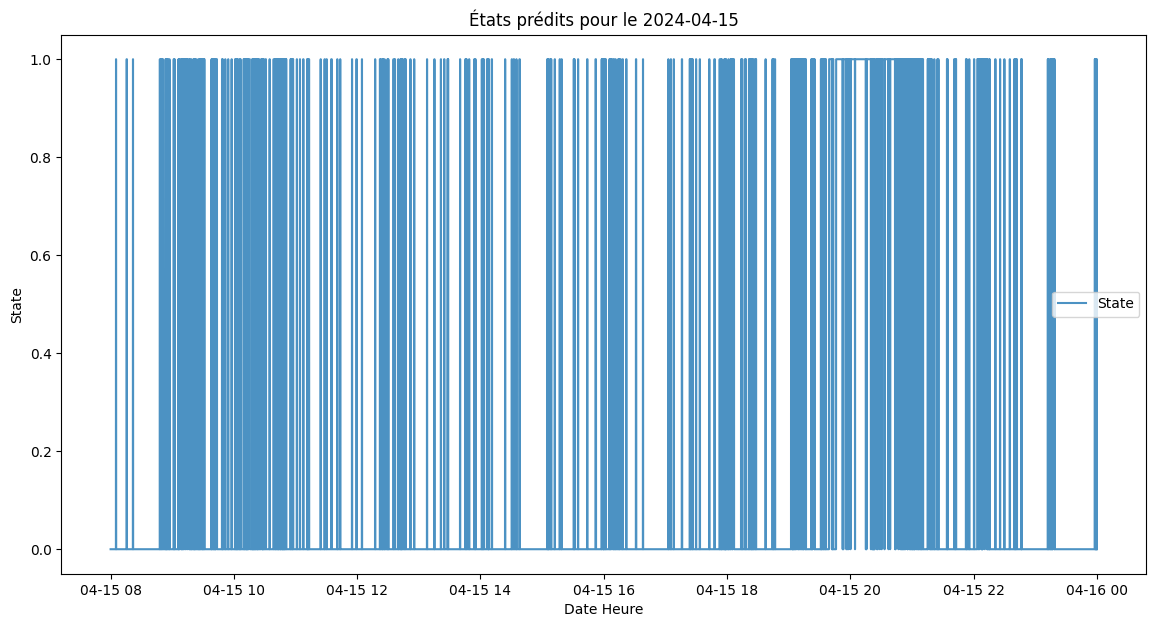

In [25]:
# Filtrer les données pour la première journée
first_day = days[0]
df_first_day = df_interpolated_10hz[df_interpolated_10hz['date'] == first_day]

# Visualiser les états prédits pour la première journée
plt.figure(figsize=(14, 7))
plt.plot(df_first_day['date_heure'], df_first_day['state'], label='State', alpha=0.8)
plt.xlabel('Date Heure')
plt.ylabel('State')
plt.title(f'États prédits pour le {first_day}')
plt.legend()
plt.show()

### supperposer la detection de changements temporels avec ruptures et HMMM 


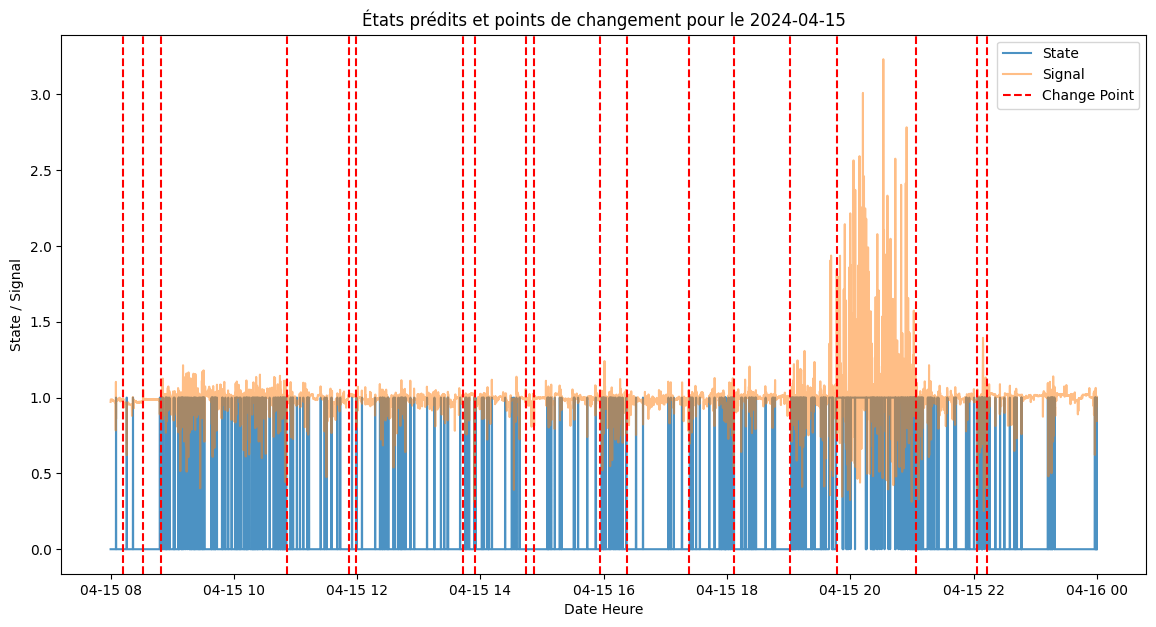

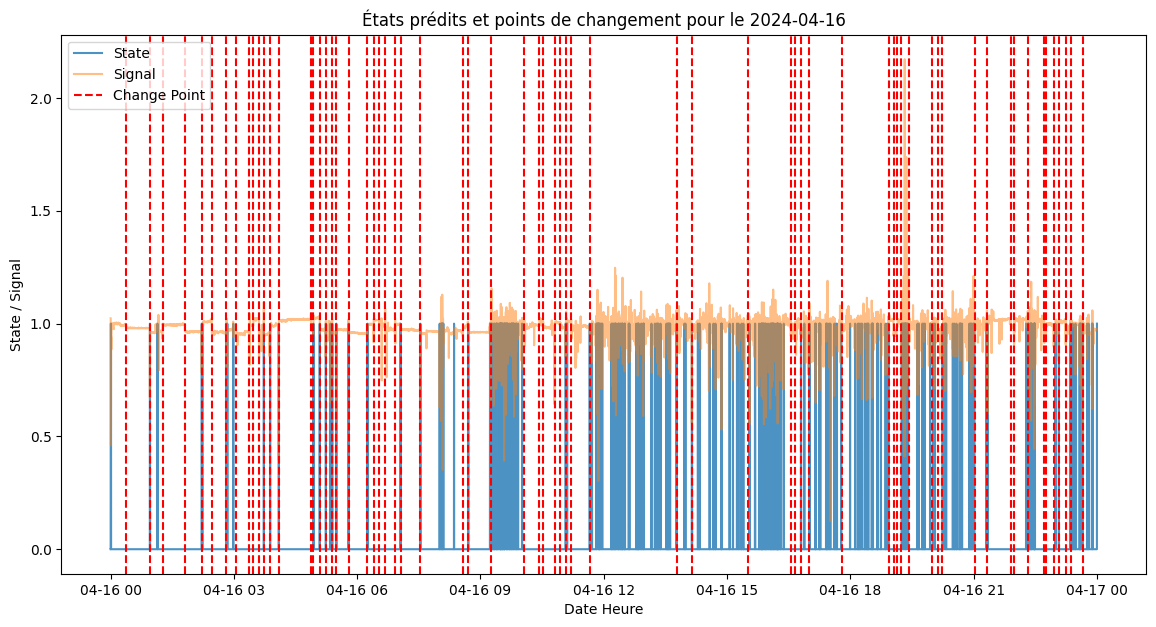

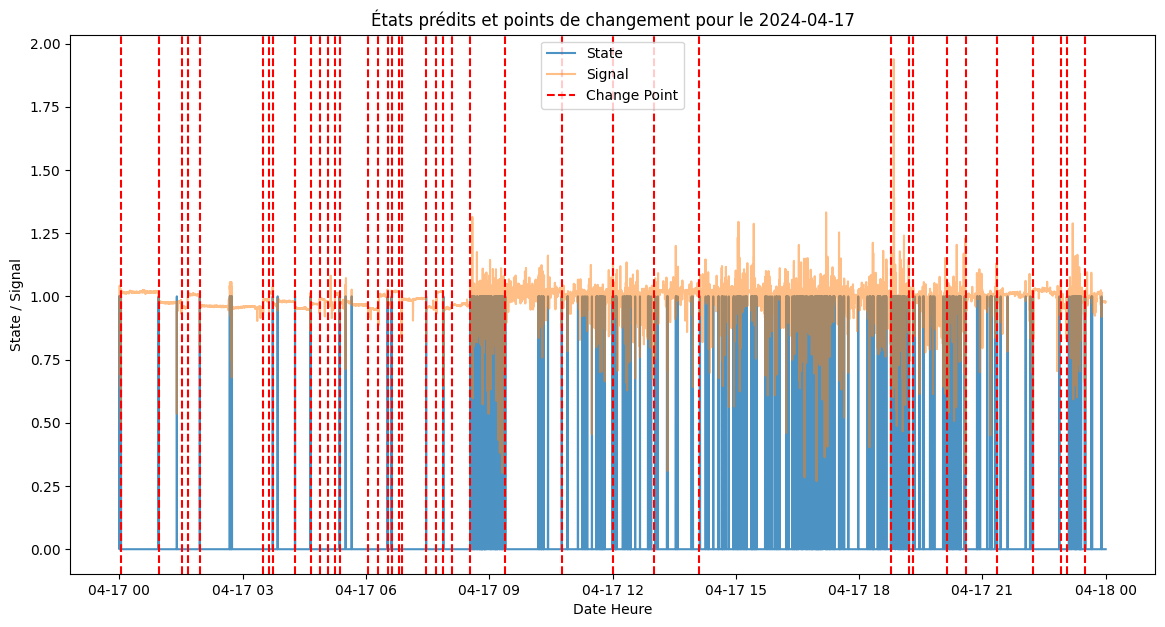

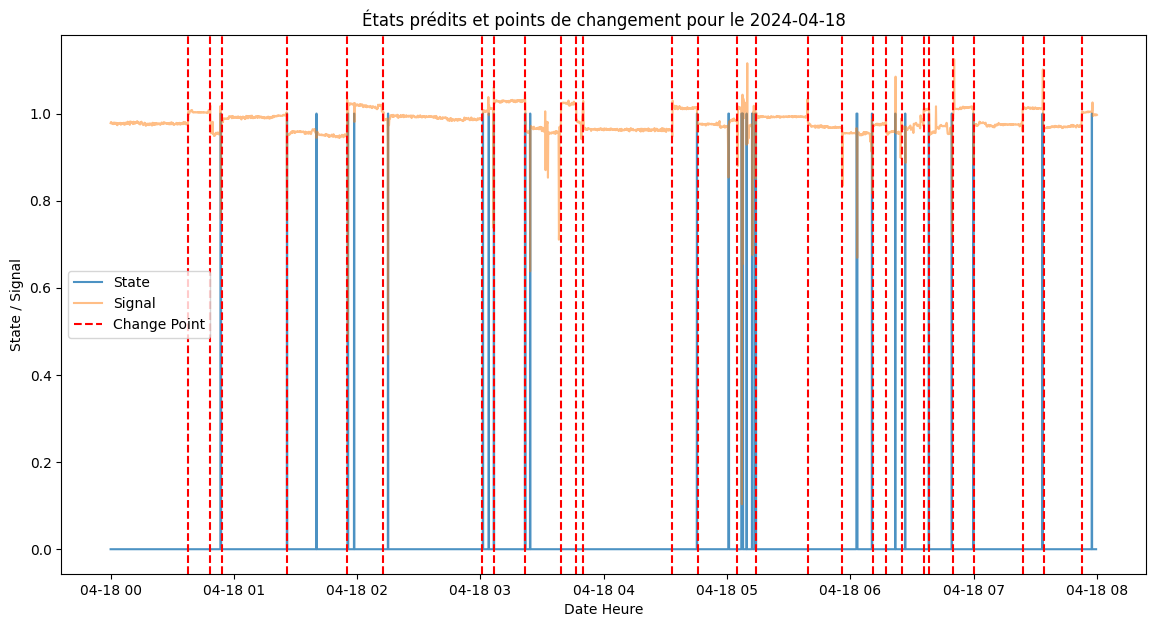

In [26]:
for day in days:
    df_day = df_interpolated_10hz[df_interpolated_10hz['date'] == day]
    signal = df_day['acceleration_globale_smooth'].values

    # Downsample the signal to reduce memory usage
    signal_downsampled = signal[::downsample_factor]
    time_downsampled = df_day['date_heure'].iloc[::downsample_factor]

    # Définir l'algorithme de détection de changement (ici, on utilise Pelt avec une pénalité)
    algo = rpt.Pelt(model="rbf").fit(signal_downsampled)
    result = algo.predict(pen=10)

    # Visualiser les états prédits et les points de changement détectés pour chaque jour
    plt.figure(figsize=(14, 7))
    plt.plot(df_day['date_heure'], df_day['state'], label='State', alpha=0.8)
    plt.plot(time_downsampled, signal_downsampled, label='Signal', alpha=0.5)
    for cp in result:
        if cp < len(time_downsampled):
            plt.axvline(time_downsampled.iloc[cp], color='r', linestyle='--', label='Change Point' if cp == result[0] else "")
    plt.xlabel('Date Heure')
    plt.ylabel('State / Signal')
    plt.title(f'États prédits et points de changement pour le {day}')
    plt.legend()
    plt.show()

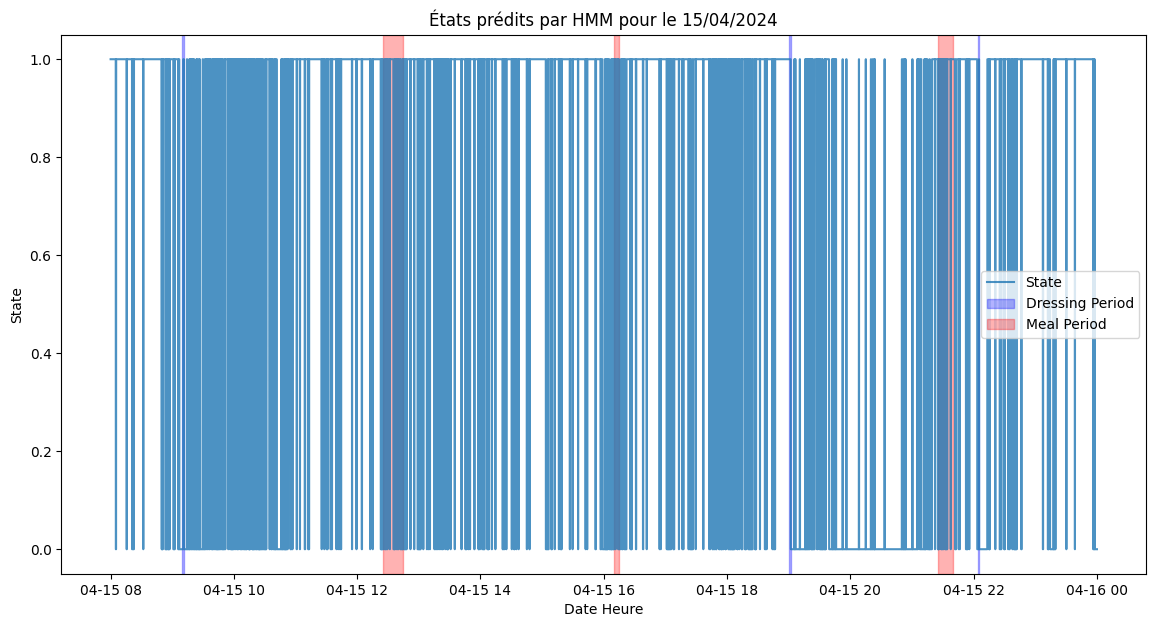

In [21]:
import datetime


# Définir les périodes d'habillage
dressing_periods = [(pd.Timestamp('2024-04-15 09:10:00'), pd.Timestamp('2024-04-15 09:12:00')),
                    (pd.Timestamp('2024-04-15 19:00:00'), pd.Timestamp('2024-04-15 19:02:00')),
                    (pd.Timestamp('2024-04-15 22:04:00'), pd.Timestamp('2024-04-15 22:05:00'))]
# Définir les périodes d'alimentation  
meal_periods = [(pd.Timestamp('2024-04-15 12:25:00'), pd.Timestamp('2024-04-15 12:45:00')),
                (pd.Timestamp('2024-04-15 16:10:00'), pd.Timestamp('2024-04-15 16:15:00')),
                (pd.Timestamp('2024-04-15 21:25:00'), pd.Timestamp('2024-04-15 21:40:00'))]


# Filtrer les données pour le 15/04/2024
df_15_april = df_interpolated_10hz[df_interpolated_10hz['date'] == datetime.date(2024, 4, 15)]

# Visualiser les états prédits par HMM pour le 15/04/2024
plt.figure(figsize=(14, 7))
plt.plot(df_15_april['date_heure'], df_15_april['state'], label='State', alpha=0.8)
plt.xlabel('Date Heure')
plt.ylabel('State')
plt.title('États prédits par HMM pour le 15/04/2024')
# Ajouter les périodes d'habillage
for start, end in dressing_periods:
    plt.axvspan(start, end, color='blue', alpha=0.3, label='Dressing Period' if start == dressing_periods[0][0] else "")
# Ajouter les périodes d'alimentation
for start, end in meal_periods:
    plt.axvspan(start, end, color='red', alpha=0.3, label='Meal Period' if start == meal_periods[0][0] else "")

plt.legend()
plt.show()



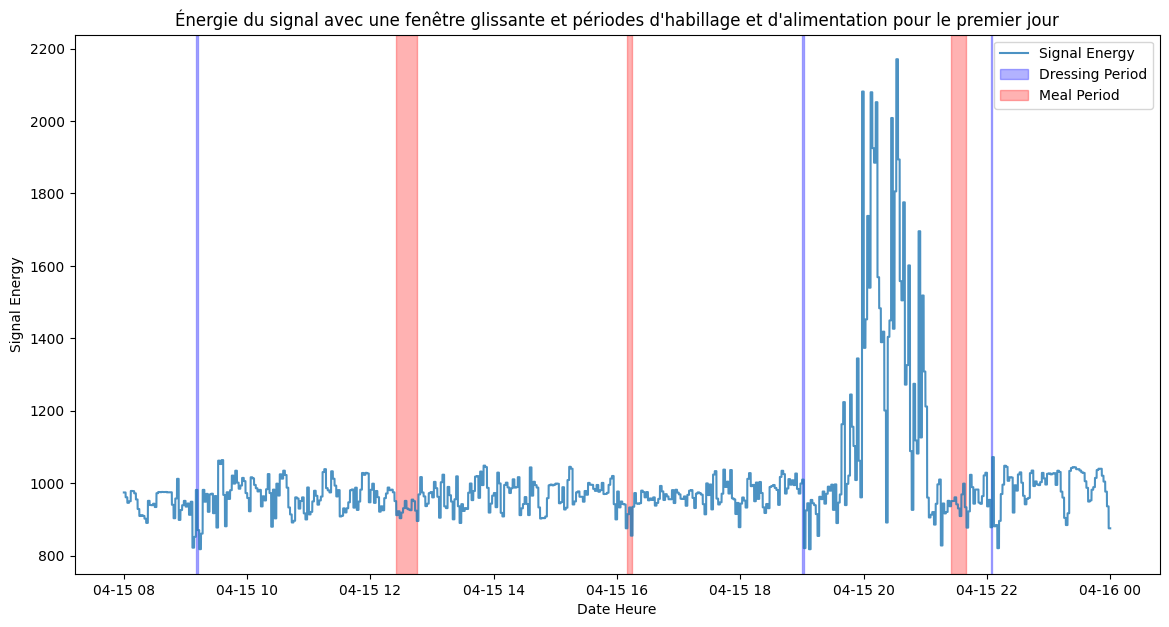

In [31]:

# Ajouter la colonne 'date' au DataFrame
df_interpolated_10hz['date'] = df_interpolated_10hz['date_heure'].dt.date

# Filtrer les données pour le premier jour
df_first_day = df_interpolated_10hz[df_interpolated_10hz['date'] == first_day]

# Définir les périodes d'habillage
dressing_periods = [(pd.Timestamp('2024-04-15 09:10:00'), pd.Timestamp('2024-04-15 09:12:00')),
                    (pd.Timestamp('2024-04-15 19:00:00'), pd.Timestamp('2024-04-15 19:02:00')),
                    (pd.Timestamp('2024-04-15 22:04:00'), pd.Timestamp('2024-04-15 22:05:00'))]

# Définir les périodes d'alimentation  
meal_periods = [(pd.Timestamp('2024-04-15 12:25:00'), pd.Timestamp('2024-04-15 12:45:00')),
                (pd.Timestamp('2024-04-15 16:10:00'), pd.Timestamp('2024-04-15 16:15:00')),
                (pd.Timestamp('2024-04-15 21:25:00'), pd.Timestamp('2024-04-15 21:40:00'))]
window_size = 1000  # par exemple, une fenêtre de 10 secondes si la fréquence d'échantillonnage est de 100 Hz

# Calculer l'énergie du signal pour chaque fenêtre
signal_energy = calculate_signal_energy(df_interpolated_10hz, window_size)

# Ajouter l'énergie du signal au DataFrame
df_interpolated_10hz['signal_energy'] = np.nan
for i, e in enumerate(signal_energy):
    df_interpolated_10hz.loc[i * window_size:(i + 1) * window_size - 1, 'signal_energy'] = e

# Filtrer les données pour le premier jour
df_first_day = df_interpolated_10hz[df_interpolated_10hz['date'] == first_day]

plt.figure(figsize=(14, 7))
plt.plot(df_first_day['date_heure'], df_first_day['signal_energy'], label='Signal Energy', alpha=0.8)

# Ajouter les périodes d'habillage
for start, end in dressing_periods:
    plt.axvspan(start, end, color='blue', alpha=0.3, label='Dressing Period' if start == dressing_periods[0][0] else "")

# Ajouter les périodes d'alimentation
for start, end in meal_periods:
    plt.axvspan(start, end, color='red', alpha=0.3, label='Meal Period' if start == meal_periods[0][0] else "")

plt.xlabel('Date Heure')
plt.ylabel('Signal Energy')
plt.title('Énergie du signal avec une fenêtre glissante et périodes d\'habillage et d\'alimentation pour le premier jour')
plt.legend()
plt.show()


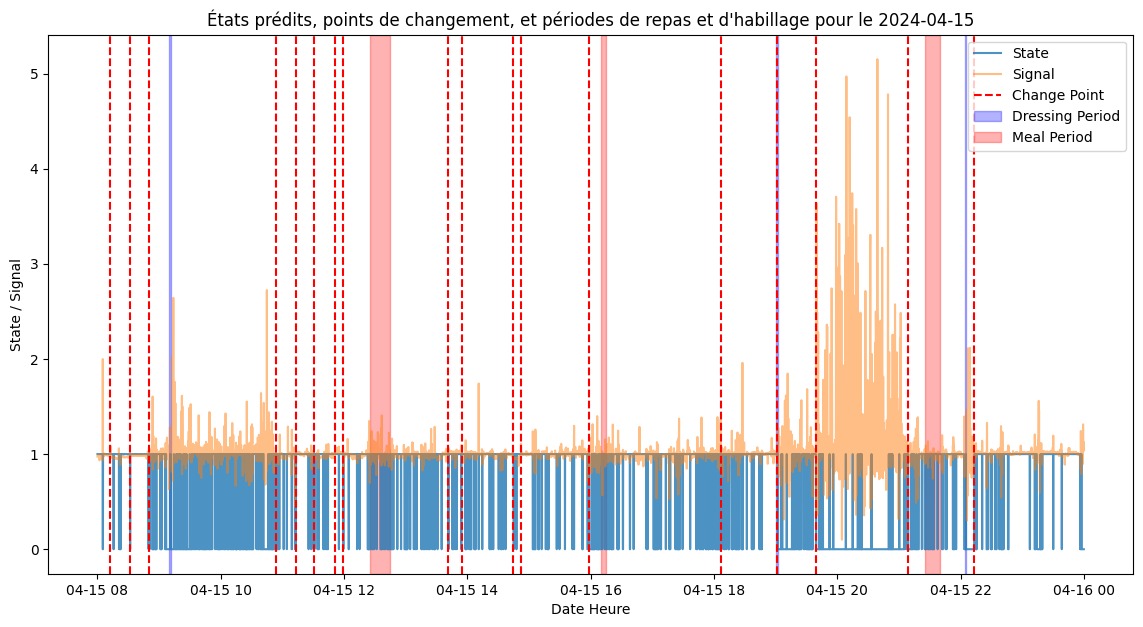

In [24]:
# Filtrer les données pour le premier jour
df_first_day = df_interpolated_10hz[df_interpolated_10hz['date'] == first_day]

# Définir l'algorithme de détection de changement (ici, on utilise Pelt avec une pénalité)
signal = df_first_day['acceleration_globale_smooth'].values
signal_downsampled = signal[::downsample_factor]
time_downsampled = df_first_day['date_heure'].iloc[::downsample_factor]
algo = rpt.Pelt(model="rbf").fit(signal_downsampled)
result = algo.predict(pen=10)

# Visualiser les états prédits, les points de changement détectés, et les périodes de repas et d'habillage
plt.figure(figsize=(14, 7))
plt.plot(df_first_day['date_heure'], df_first_day['state'], label='State', alpha=0.8)
plt.plot(time_downsampled, signal_downsampled, label='Signal', alpha=0.5)
for cp in result:
    if cp < len(time_downsampled):
        plt.axvline(time_downsampled.iloc[cp], color='r', linestyle='--', label='Change Point' if cp == result[0] else "")

# Ajouter les périodes d'habillage
for start, end in dressing_periods:
    plt.axvspan(start, end, color='blue', alpha=0.3, label='Dressing Period' if start == dressing_periods[0][0] else "")

# Ajouter les périodes de repas
for start, end in meal_periods:
    plt.axvspan(start, end, color='red', alpha=0.3, label='Meal Period' if start == meal_periods[0][0] else "")

plt.xlabel('Date Heure')
plt.ylabel('State / Signal')
plt.title(f'États prédits, points de changement, et périodes de repas et d\'habillage pour le {first_day}')
plt.legend()
plt.show()

In [25]:
# Entraîner un modèle HMM sur 7 états
model_7_states = hmm.GaussianHMM(n_components=7, covariance_type="full", n_iter=100)
model_7_states.fit(descriptors_scaled)

# Prédire les états pour chaque fenêtre
states_7 = model_7_states.predict(descriptors_scaled)

# Ajouter les états prédits au DataFrame
df_interpolated_10hz['state_7'] = np.nan
for i, state in enumerate(states_7):
    df_interpolated_10hz.loc[i * window_size:(i + 1) * window_size - 1, 'state_7'] = state

print(df_interpolated_10hz.head())

Model is not converging.  Current: 1011832.7121148722 is not greater than 1108671.9127848838. Delta is -96839.20067001157


               date_heure         X        Y         Z  X_smooth  Y_smooth  \
0 2024-04-15 08:00:05.140 -0.578125  0.09375  0.734375 -0.590010  0.097332   
1 2024-04-15 08:00:05.240 -0.593750  0.09375  0.781250 -0.593310  0.094838   
2 2024-04-15 08:00:05.340 -0.593750  0.09375  0.781250 -0.594286  0.094697   
3 2024-04-15 08:00:05.440 -0.593750  0.09375  0.781250 -0.594312  0.095257   
4 2024-04-15 08:00:05.540 -0.593750  0.09375  0.781250 -0.594755  0.095543   

   Z_smooth  acceleration_globale  acceleration_globale_smooth  signal_energy  \
0  0.768510              0.939321                     0.973752     976.204585   
1  0.780794              0.985738                     0.985216     976.204585   
2  0.783295              0.985738                     0.987772     976.204585   
3  0.781250              0.985738                     0.986221     976.204585   
4  0.781250              0.985738                     0.986516     976.204585   

         date  state  state_7  
0  2024-04-1

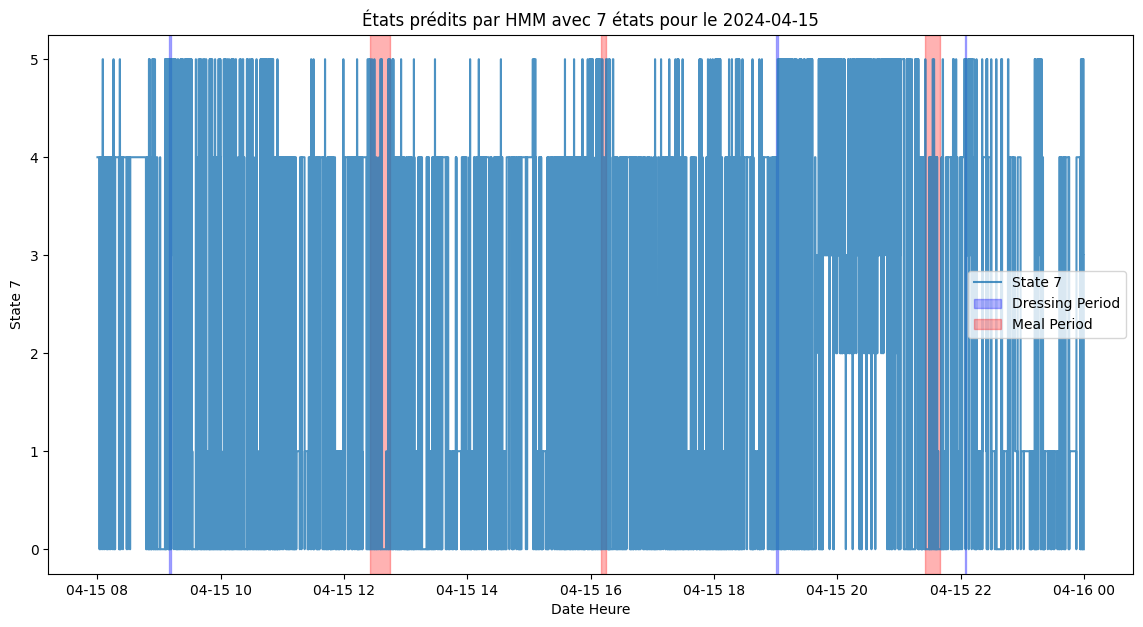

In [26]:
# Filtrer les données pour le premier jour
df_first_day = df_interpolated_10hz[df_interpolated_10hz['date'] == first_day]

# Visualiser les états prédits par HMM avec 7 états pour le premier jour
plt.figure(figsize=(14, 7))
plt.plot(df_first_day['date_heure'], df_first_day['state_7'], label='State 7', alpha=0.8)
plt.xlabel('Date Heure')
plt.ylabel('State 7')
plt.title(f'États prédits par HMM avec 7 états pour le {first_day}')

# Ajouter les périodes d'habillage
for start, end in dressing_periods:
    plt.axvspan(start, end, color='blue', alpha=0.3, label='Dressing Period' if start == dressing_periods[0][0] else "")

# Ajouter les périodes de repas
for start, end in meal_periods:
    plt.axvspan(start, end, color='red', alpha=0.3, label='Meal Period' if start == meal_periods[0][0] else "")

plt.legend()
plt.show()

In [7]:
import matplotlib.pyplot as plt

inactivity_file = "inactivity_data.csv"  # Contient sib.onset.time, sib.end.time

inactivity_data = pd.read_csv(inactivity_file)

In [10]:
inactivity_data["sib.onset.time"] = pd.to_datetime(inactivity_data["sib.onset.time"])
inactivity_data["sib.end.time"] = pd.to_datetime(inactivity_data["sib.end.time"])
print(inactivity_data.head())




   night definition            start.time.day  nsib.periods  tot.sib.dur.hrs  \
0      1       T5A5  2024-04-15T12:00:00+0200            39         0.090333   
1      1       T5A5  2024-04-15T12:00:00+0200            39         0.173667   
2      1       T5A5  2024-04-15T12:00:00+0200            39         0.095833   
3      1       T5A5  2024-04-15T12:00:00+0200            39         0.112500   
4      1       T5A5  2024-04-15T12:00:00+0200            39         0.086167   

   fraction.night.invalid  sib.period            sib.onset.time  \
0                     0.0           1 2024-04-15 14:38:00+02:00   
1                     0.0           2 2024-04-15 14:52:40+02:00   
2                     0.0           3 2024-04-15 15:19:00+02:00   
3                     0.0           4 2024-04-15 16:31:25+02:00   
4                     0.0           5 2024-04-15 16:48:30+02:00   

               sib.end.time  
0 2024-04-15 14:43:20+02:00  
1 2024-04-15 15:03:00+02:00  
2 2024-04-15 15:24:40+02:0

## Periode d'inactivité calculer avec GGIR sur R 

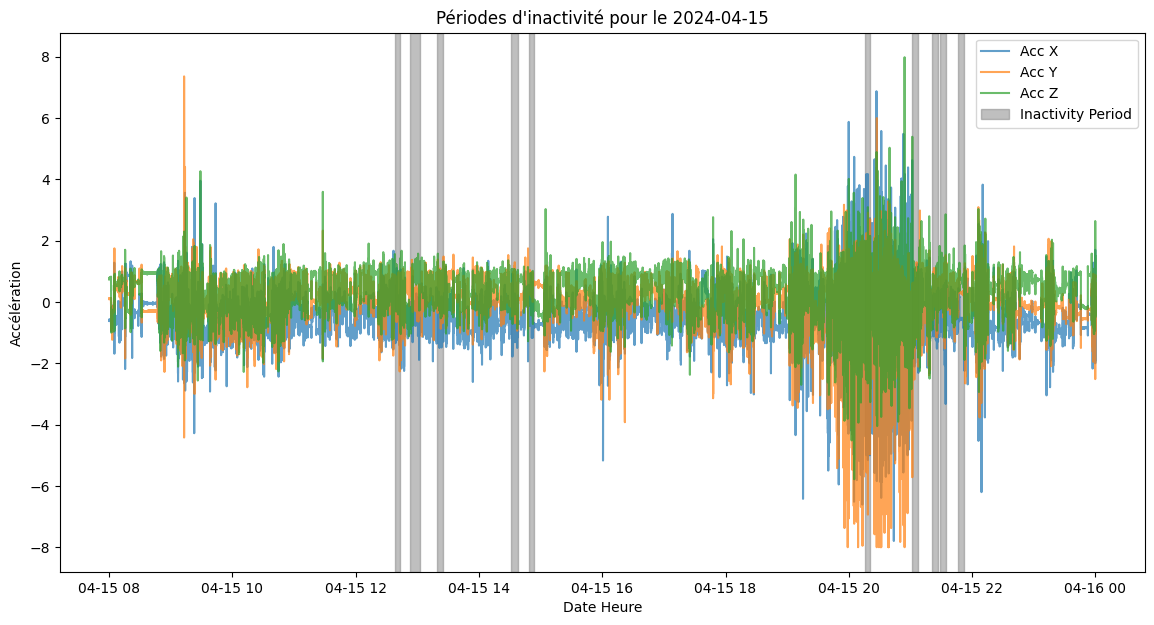

/Users/leoolivier/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


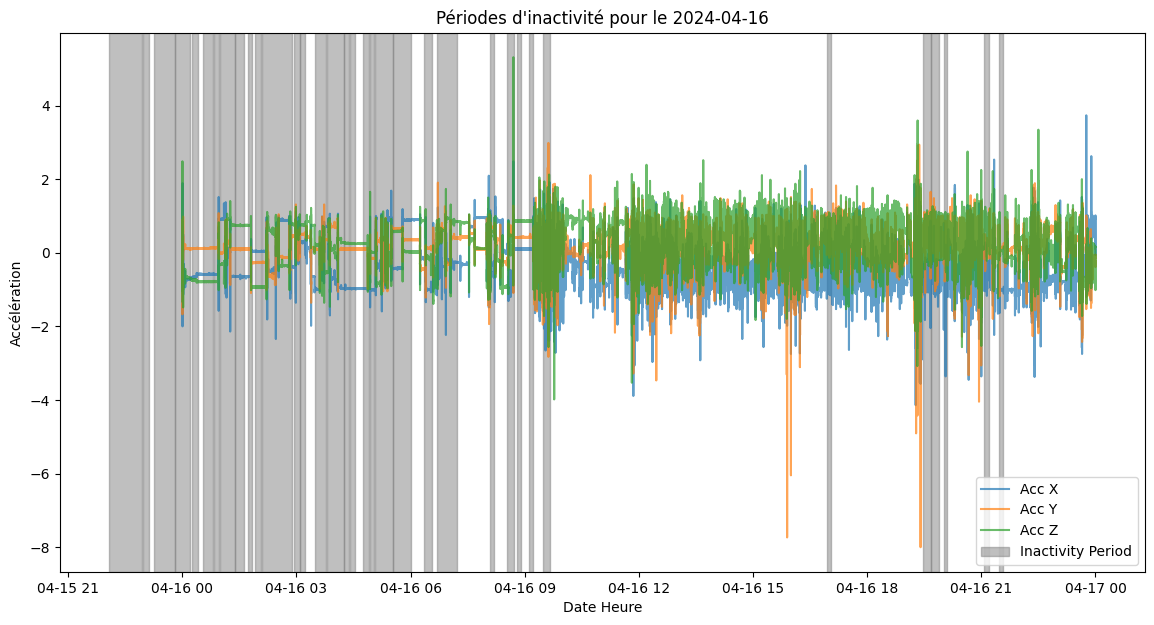

/Users/leoolivier/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


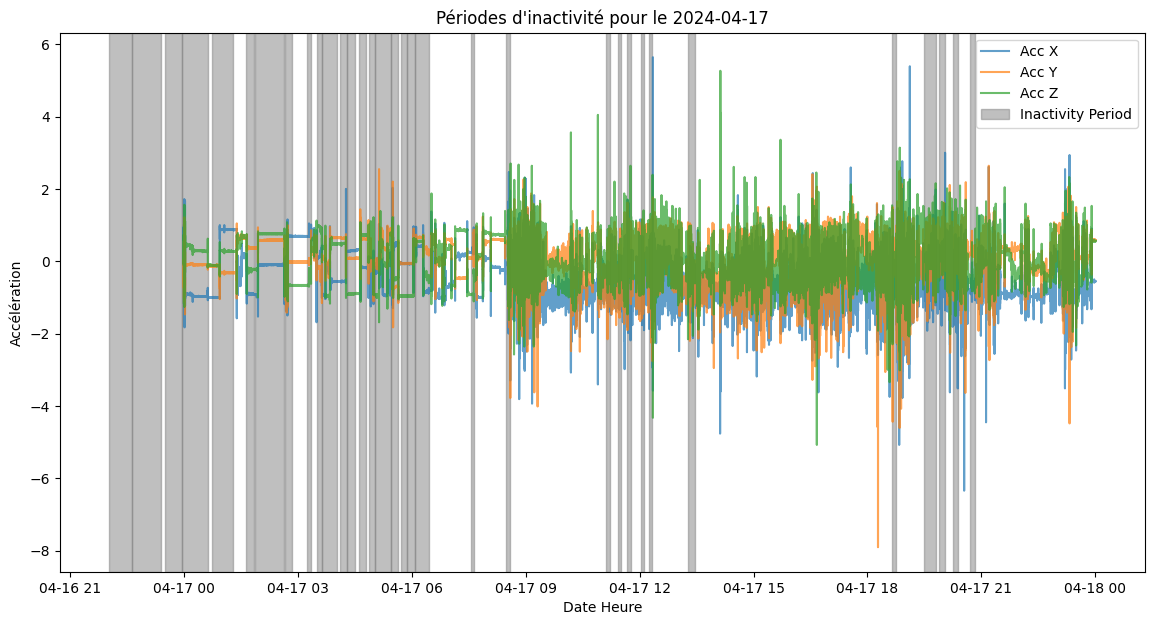

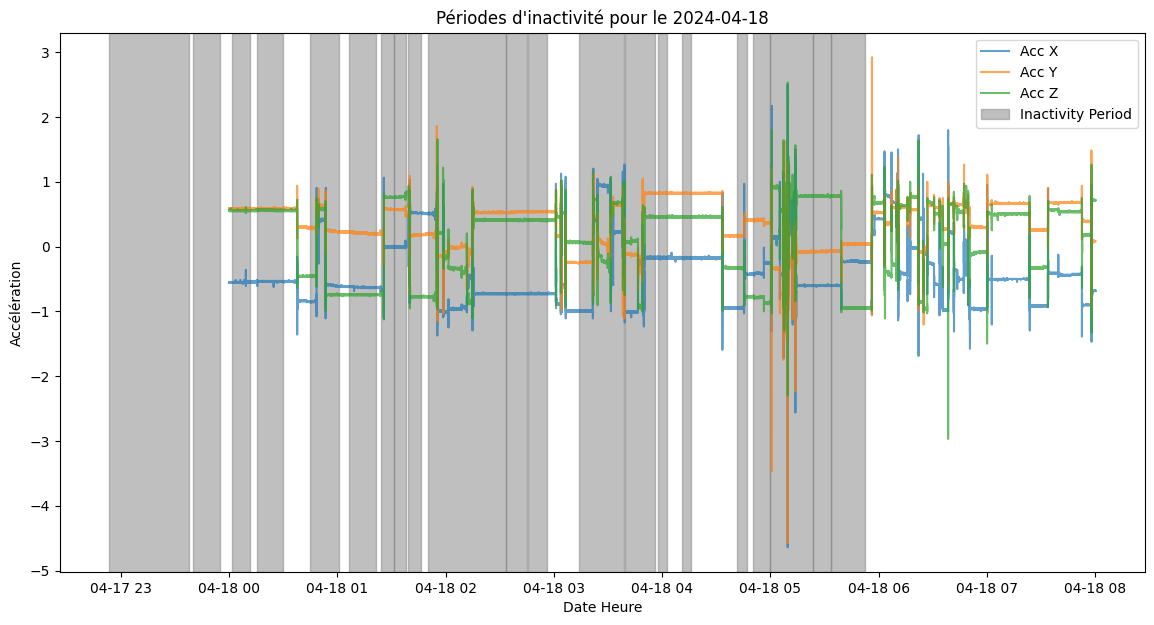

In [13]:
# Ajouter une colonne 'date' à df_interpolated pour faciliter le filtrage par jour 
df_interpolated['date'] = df_interpolated['date_heure'].dt.date


# Obtenir les jours uniques dans df_interpolated
days = df_interpolated['date'].unique()

# Visualiser les périodes d'inactivité jour par jour 
for day in days:
    df_day = df_interpolated[df_interpolated['date'] == day]
    inactivity_periods = inactivity_data[(inactivity_data['sib.onset.time'].dt.date == day) & (inactivity_data['sib.end.time'].dt.date == day)]
    
    plt.figure(figsize=(14, 7))
    plt.plot(df_day['date_heure'], df_day['X'], label='Acc X', alpha=0.7)
    plt.plot(df_day['date_heure'], df_day['Y'], label='Acc Y', alpha=0.7)
    plt.plot(df_day['date_heure'], df_day['Z'], label='Acc Z', alpha=0.7)
    
    for _, row in inactivity_periods.iterrows():
        plt.axvspan(row['sib.onset.time'], row['sib.end.time'], color='gray', alpha=0.5, label='Inactivity Period' if row.name == inactivity_periods.index[0] else "")
    
    plt.xlabel('Date Heure')
    plt.ylabel('Accélération')
    plt.title(f'Périodes d\'inactivité pour le {day}')
    plt.legend()
    plt.show()

In [31]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean


In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

# Fonction de segmentation avec DTW 
def segment_with_dtw(data, ref_segment, window_size=50, step=10, threshold=0.5):
    segment_positions = []
    distances = []
    
    for i in range(0, len(data) - window_size, step):
        segment = data.iloc[i:i + window_size, 1:4].values  # Exclure la colonne 'date_heure'
        distance, _ = fastdtw(segment, ref_segment, dist=euclidean)
        distances.append(distance)

        if distance < threshold:  # Détection d'un segment similaire
            segment_positions.append(i)

    return segment_positions, distances

# Définition d'un segment de référence (ex: une période de mouvement particulier)
meal_period = meal_periods[0]
ref_segment = df_interpolated_10hz[(df_interpolated_10hz['date_heure'] >= meal_period[0]) & (df_interpolated_10hz['date_heure'] <= meal_period[1])].iloc[:, 1:4].values

# Segmentation avec DTW
segment_positions, distances = segment_with_dtw(df_interpolated_10hz, ref_segment, window_size=50, step=10, threshold=5)

# Visualisation des segments détectés
plt.figure(figsize=(10, 5))
plt.plot(df_interpolated_10hz['date_heure'], df_interpolated_10hz['X'], label='Acc X', alpha=0.7)
plt.plot(df_interpolated_10hz['date_heure'], df_interpolated_10hz['Y'], label='Acc Y', alpha=0.7)
plt.plot(df_interpolated_10hz['date_heure'], df_interpolated_10hz['Z'], label='Acc Z', alpha=0.7)
plt.scatter(df_interpolated_10hz.iloc[segment_positions]['date_heure'], df_interpolated_10hz.iloc[segment_positions]['X'], color='red', label='Segments détectés', zorder=3)
plt.legend()
plt.title('Segmentation des mouvements avec DTW')
plt.xlabel('Temps (s)')
plt.ylabel('Accélération')
plt.show()

# Visualisation des distances DTW
plt.figure(figsize=(10, 3))
plt.plot(distances, label="Distance DTW")
plt.axhline(y=5, color='r', linestyle='--', label="Seuil")
plt.legend()
plt.title("Évolution de la distance DTW sur les fenêtres")
plt.xlabel("Fenêtres")
plt.ylabel("Distance DTW")
plt.show()
